# Principal Component Analysis
## Using scikit-learn and Data Set 1

### Principal Components Analysis:
- Also known as PCA
- Unsupervised machine learning algorithm
- Useful for data mining and feature analysis
    - Helps with finding significant features and reducing feature dimensions
- Aims to condense features/columns into a set of Principal Components using eigenvalues/vectors
    - A dataset with $N$ columns will have $N$ Principal Components...
    - However, it is usually the case that just a few Principal Components are enough to accurately portray the dataset using fewer dimensions
    - This makes using Principal Components Analysis very popular for visualizing high-dimension datasets on graphs
- PCA can be sensitive to outliers

### Basics:
- From a high-level point of view:
    - PCA transforms a $N$-dimension dataset into another $N$-dimension dataset
    - ***BUT***, this new dataset identifies what dimensions can be removed without altering what the dataset represents
    - This leads to a much smaller dataset that is simpler to work with but still as useful as the orginal dataset
- How this is done using Scikit-Learn:
    - Mathematically, there are a few ways to perform PCA but Sci-kit Learn uses SVD
        - Learn more about SVD (Singular Value Decomposition) [here](http://mathworld.wolfram.com/SingularValueDecomposition.html)
    - First, the dataset is normalized so that the mean of each column is 0
    - SVD is then applied to the $N$-dimension dataset and $N$ eigenvectors and their accompanying eigenvalues are created
    - The eigenvalues for each eigenvector are then used to identify which eigenvectors best represent the variation in the original dataset
        - The higher the eigenvalue, the better its eigenvector is
    - Then depending on user preferences, $X$ of the eigenvectors with the highest eigenvalues are chosen and combined into a matrix
    - *FINALLY*, the transpose of the new eigenvector matrix and the transpose of the normalized dataset are multiplied together to create the $X$ Principal Components
    
- Applying PCA to a dataset does decrease the amount of information found in the dataset but if done correctly, this decrease is usually only 1-5%

## Explanation:

### Import the recquired packages/modules

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Read in data from Data Set 1.csv and store as variable *data*
- Use train_test_split() from scikit-learn to divide the data in the most efficient way possible
- Store as variables X_train, X_test, y_train, y_test

In [5]:
data = pd.read_csv("Data Set 1.csv", header = 1)
X_data = data.iloc[:,1:] #store the features in this variable

### Use PCA() from sklearn decomposition module
- List of parameters available [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    - We will keep $N = 5$ Components after the analysis of about 30 rows
- PCA() declares the variable *pca* as a Principal Component model
- Use fit_transform(X_data) to fit the *pca* model and then transform X_data with it
- *pca* is now created
- X_data went from having 30 columns to only 5 using *pca*

In [8]:
N = 5
pca = PCA(n_components=N)
X_data = pca.fit_transform(X_data)
X_data.shape

(113, 5)

### Print the PCA's score and each row's 5 Components

In [9]:
pca.score(X_data)

-28.551738906367202

### The following graph is a Scree Plot
- Shows how much variance each of the top principal components account for

[  5.05647125e+05   9.73643888e+03   4.70211102e+03   1.74906520e+03
   1.07153657e+02]


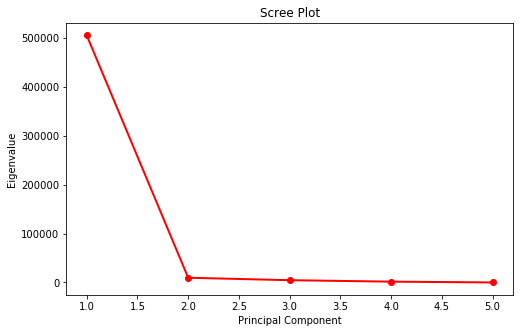

In [15]:
eigvals = pca.explained_variance_
print(eigvals)

fig = plt.figure(figsize=(8,5))
sing_vals = [1,2,3,4,5]
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

Sources:
- http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- http://scikit-learn.org/stable/modules/decomposition.html#pca
- https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial
- http://setosa.io/ev/principal-component-analysis/
- https://chrisalbon.com/machine-learning/feature_extraction_with_pca.html